# Clasificador de tipos de plantas Iris empleando ML
- Iris-Setosa
- Iris-Versicolour
- Iris_Virginica

## Data mining  -> no tenemos que buscar porque se nos suministra

### Organizar la data / entender / procesar

In [1]:
import pandas as pd
from IPython.core.display import HTML
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

datos=load_iris()
datos

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
print(datos.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
#datos["data"]
#datos.data
# feature_names -> nombres de las columnas de la data
data_df=pd.DataFrame(data=datos.data,columns=datos.feature_names)
display(HTML(data_df.to_html()))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
'''
target
- Iris-Setosa       -> 0
- Iris-Versicolour  -> 1
- Iris_Virginica    -> 2
'''

target=pd.DataFrame(data=datos.target,columns=["species"])
display(HTML(target.to_html()))

,species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [5]:
iris=pd.concat([data_df,target],axis=1)
display(HTML(iris.to_html()))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
iris.rename({
    "sepal length (cm)":"sepal_length",
    "sepal width (cm)" :"sepal_width",
    "petal length (cm)":"petal_length",
    "petal width (cm)" :"petal_width"    
},axis=1,inplace=True)
#display(HTML(iris.to_html()))
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
print(list(datos.target_names))

iris["species"]=iris.species.map(lambda x:datos.target_names[x])
#la funcion map con lamba hace una especie de reemplazo al bucle for,
#aplica una accion a cada miembro  de la lista que estamos modificando
#en este caso busca la posicion target_names[0],target_names[1],target_names[2]
#y reemplaza por su respectivo valor que seria el nombre de la especie
'''
entonces el mapeo con lambda es los mismo que poner todo esto:
for elemento in iris["species"]:
    elemento=funcion(elemento)   
def funcion(elemento):
    if elemento==0:
        return "setosa"
    elif elemento==1:
        return "virginica"
    elif elemento==2:
        return "versicolor"

'''

display(HTML(iris.to_html()))

['setosa', 'versicolor', 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [8]:
# verificar si existen valores nulos NaN
iris.isna().sum()

# recomendacion las filas con valores NaN casi siempre se eliman 
#porque se consideran outliars (valores fuera de rango)
# en ocaciones puntuales, segun el entendimeinto de la data
#y el criterio del investigador (programador quiza) pongo un promedio

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Analisis de los datos

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### PRIMER ANALISIS

Entre mas grande sea la desviacion estandar (mas lejos esta el punto del modelo) osea que es menos parecido. desviacion estandar alta es malo!!!!!!!!!

si la desviacion estandar es pequeña hay mas correlacion recordemos que la correlacion es que tanto se parece la muestra al modelo

Analizamos desviacion estandar

petal_length tiene la mayor desviación estándar en comparación con otras características, petal_width parece tener un rango de valores más estrecho Sería mejor realizar una regularización después de comprobar el rendimiento del modelo debido a las diferencias de escala entre las características.

In [10]:
# correlacion: analiza la relacion(que tanto se parecen) las caracteristicas
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


El coeficiente de correlación de la petal_length y de petal_width es de 0,962865, que es extremadamente alto. Dado que las características altamente correlacionadas pueden inducir problemas (IA) de multicolinealidad, se recomienda seleccionar una de las dos variables a utilizar. o mejor, mirar como diferenciar haciendo un deep trainig con las otras caracteristicas

In [11]:
iris.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [12]:
iris.groupby("species").count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


Seleccione entre "size" y "count" dependiendo del propósito del análisis, ya que "size" cuenta el número de datos que incluyen valores NaN, mientras que "count" cuenta el número de datos sin valores NaN. En este caso, no hay diferencia entre "size" y "count" porque los datos de iris no tienen valores NaN.

## Graficas representativas

### Box plot -> diagrama de caja

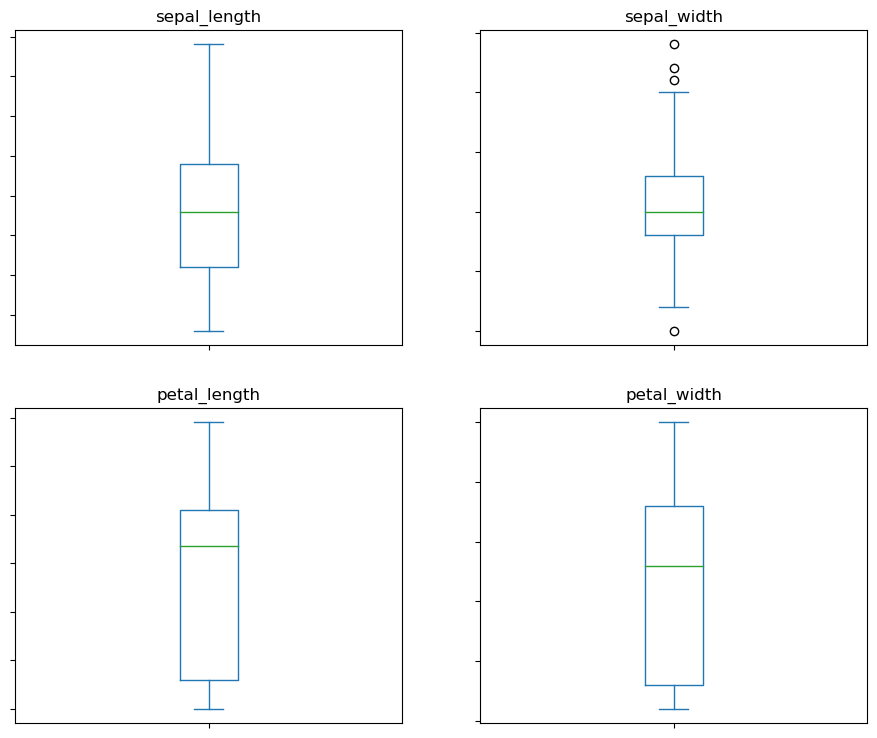

In [13]:
#https://byjus.com/maths/box-plot/

def boxplot_iris(feature_names,dataset):
    i=1
    plt.figure(figsize=(11,9))
    
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis("on")
        plt.tick_params(axis="both",
                        left=True,
                        top=False,
                        right=False,
                        bottom=True,
                        labelleft=False,
                        labeltop=False,
                        labelright=False,
                        labelbottom=False)
        dataset[col].plot(kind="box",subplots=True,sharex=False)
        plt.title(col)
        i+=1
    plt.show()
    
boxplot_iris(iris.columns[:-1],iris)

Dado que las longitudes de las cajas de sepal_length y sepal_width son cortas, se puede deducir que la tendencia de centralización de los datos es alta. El valor atípico(outliar) se detecta en sepal_width, y la longitud de caja larga de petal_length y petal_width indica que los datos están más ampliamente distribuidos.

### Histograma

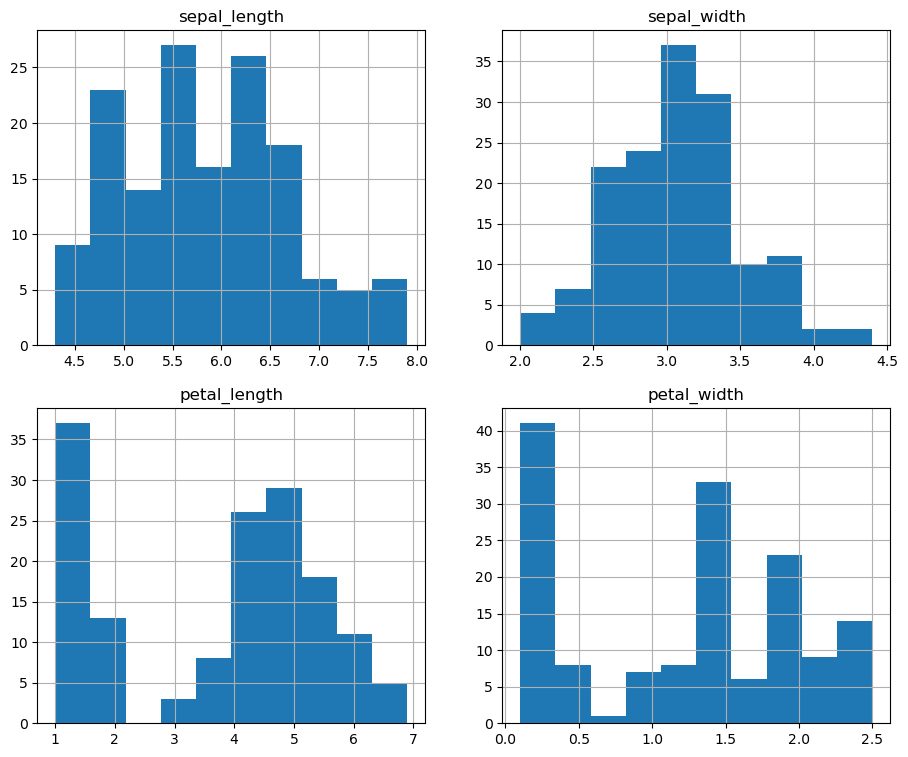

In [14]:
def hisplot_iris(feature_names,dataset):
    i=1
    plt.figure(figsize=(11,9))
    
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis("on")
        plt.tick_params(axis="both",
                        left=True,
                        top=False,
                        right=False,
                        bottom=True,
                        labelleft=True,
                        labeltop=False,
                        labelright=False,
                        labelbottom=True)
        dataset[col].hist()
        plt.title(col)
        i+=1
    plt.show()
    
hisplot_iris(iris.columns[:-1],iris)

La frecuencia del intervalo de clase de la mediana es alta para sepal_width, y se vuelve más baja a medida que se aleja del centro. En el diagrama de caja, la longitud de la caja de sepal_width es corta porque se agregaron muchos datos en la mediana. En el caso de la petal_width, la frecuencia del intervalo de clase de la mediana es alta, pero hay muchos datos en el intervalo de clase de la izquierda. En el gráfico de caja, la caja de petal_lengh es larga hasta el fondo porque hay muchos datos en valores inferiores.

In [15]:
# import sys
# !{sys.executable} -m pip install seaborn
import seaborn as sns

### Heatmap (mapa de calor)

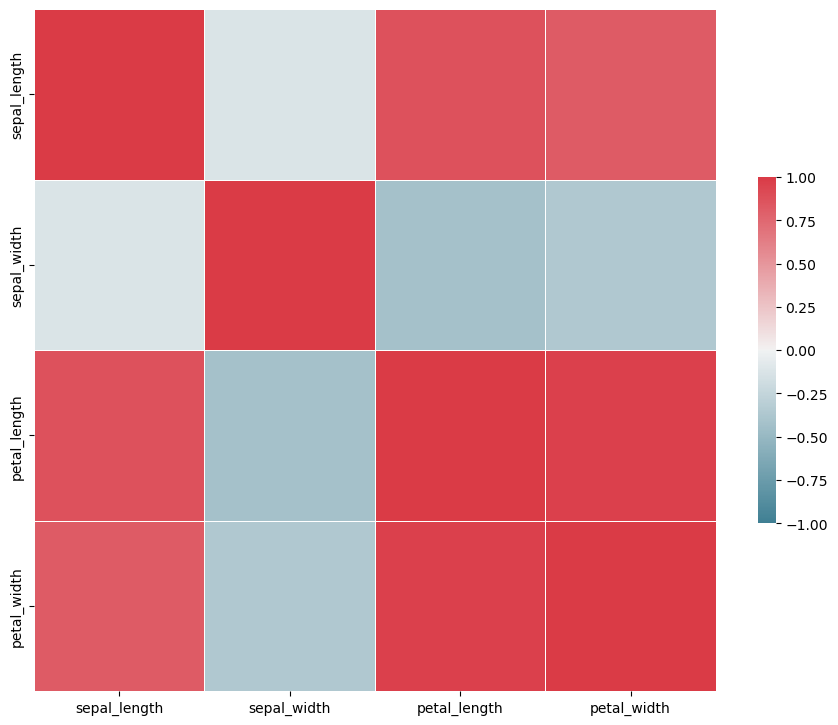

In [17]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

corr=iris.corr()

cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(11,9))
sns.heatmap(corr,
            cmap=cmap,
            vmax=1.0,
            vmin=-1.0,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink":0.5}     
           )
plt.show()

# Matriz de dispersion
puede mostrar la relacion entre multiples variables

<Figure size 1100x900 with 0 Axes>

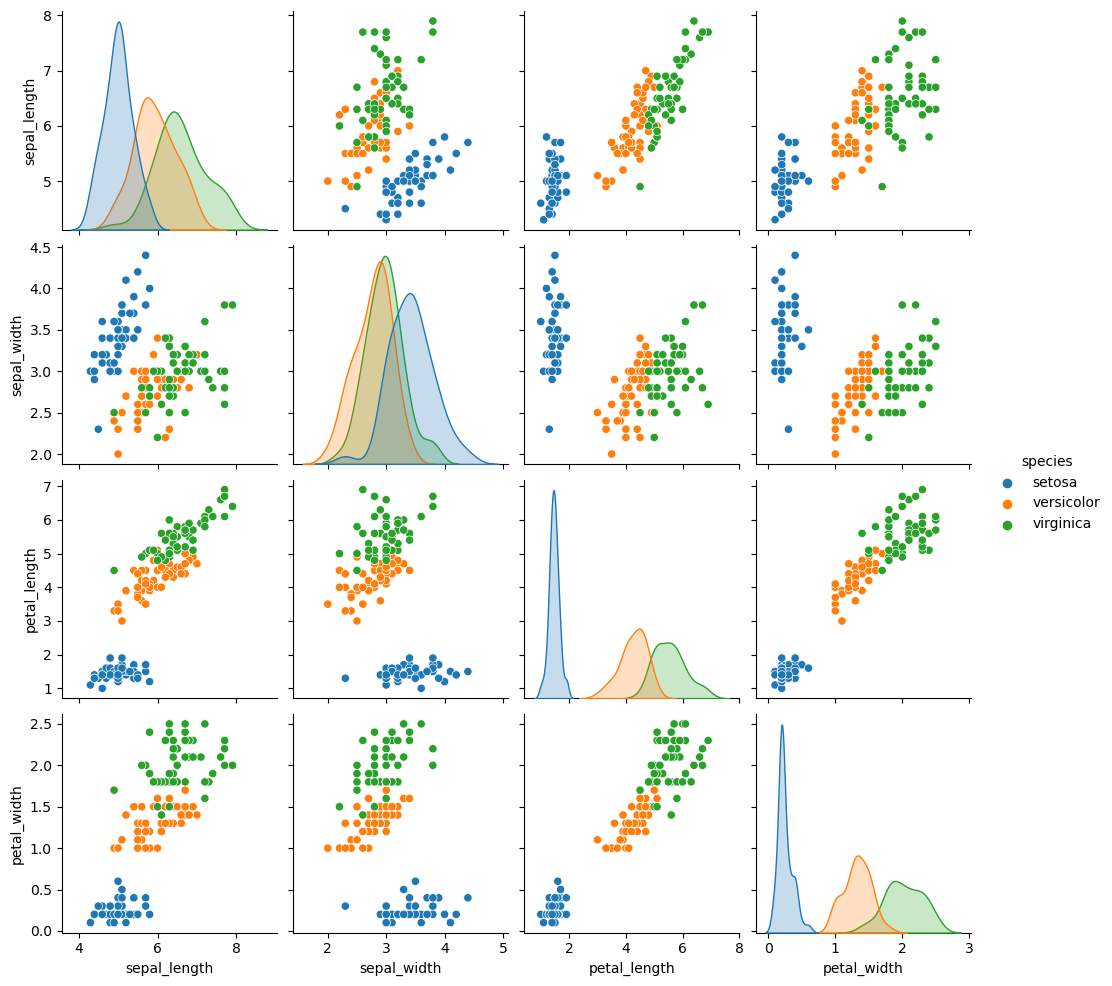

In [18]:
plt.figure(figsize=(11,9))
sns.pairplot(iris,hue="species")
plt.show()

Iris-setosa se agrega al desviarse claramente de otras clases. La clasificación es posible trazando una línea imaginaria, y setosa se clasificará como un modelo lineal.

En el caso de versicolor y virginica, parece difícil clasificarlas trazando una línea porque están mezcladas en el gráfico completo con las características sepal_width y sepal_length. Sin embargo, aunque parezca un poco vago, se pueden clasificar en otros gráficos.

- Explicacion en palabras mas sencillas:
    cuando se este creando el modelo el va a tomar una columnay le va a dar prioridad sobre otra
        y=f(x), si no es capaz de sacar un modelo o una funcion que diferencie 2 tipos de plantas, va a "descartar" esas 2 columnas como prioridades y pasa a analizar otro par de columnas como prioridad buscando encontrar un modelo(funcion) mas mas centrada para cada tipo de planta (una funcion ams concluyente)

### Grafico circular

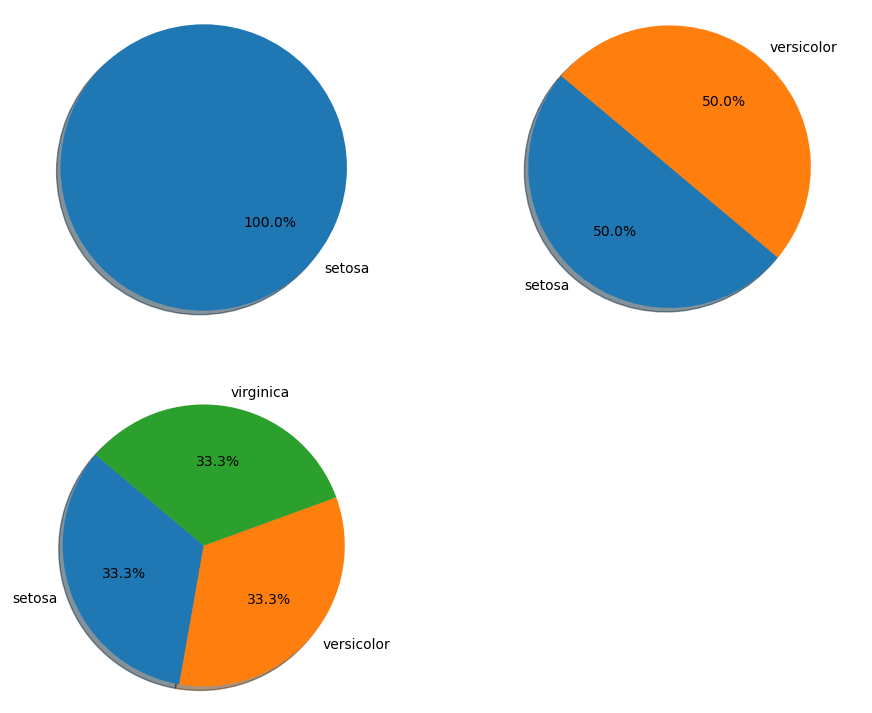

In [19]:
def piechar_iris(feature_names,target,dataset):
    i=1
    plt.figure(figsize=(11,9))
    for colname in [target]:
        labels=[]
        sizes=[]
        df=dataset.groupby(colname).size()
        for key in df.keys():
            labels.append(key)
            sizes.append(df[key])
            plt.subplot(2,2,i)
            plt.axis("on")
            plt.tick_params(axis="both",
                            left=True,
                            top=False,
                            right=False,
                            bottom=True,
                            labelleft=True,
                            labeltop=True,
                            labelright=False,
                            labelbottom=False)
            plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,startangle=140)
            plt.axis("equal")
            i+=1
        plt.show()
            
piechar_iris(iris.columns[:-1],iris.species,iris) 

# Creacion del modelo de ML 

Antes de iniciar el aprendizaje automático, hay que dividir el conjunto de datos en datos de entrenamiento y datos de prueba de rendimiento. El objetivo final del aprendizaje automático es crear un modelo generalizado para que pueda predecir con precisión nuevos datos. Si se evalúa el rendimiento con los datos que se utilizaron en el aprendizaje, la posibilidad de acertar es alta, ya que el modelo ya está familiarizado con la característica de los datos dada. Para que la evaluación sea fiable, hay que separar el conjunto de datos de prueba de rendimiento del conjunto de datos de entrenamiento. Por tratarse de la separación de los datos, se denomina método hold out.

Divida el conjunto de datos de entrenamiento y el conjunto de datos de prueba de rendimiento con la función train_test_split de sklearn. Clasifique los datos de entrenamiento como "train" y los datos de prueba de rendimiento como "test". X es la característica del conjunto de datos, e y es el objetivo. Para el análisis de datos estructurados, indique DataFrame con mayúsculas y Series con minúsculas. La opción test_size=0.33 separa el 33% de los datos totales como conjunto de prueba. random_state=42 es una opción utilizada para inducir resultados reproducibles para el problema de la práctica. Si no se designa random_state, el conjunto de datos para la conversión será diferente cada vez.

NOTA: 3 pasos :

1. instanciar.

    1.1 :definir el modelo
2. fit ->ajustar
3. predecir
para instanciar, utilice el hiperparametro del modelo como argumento.

El hiperparametro es una opcion que REQUIERE CONFIGURACION HUMANA (AI SUPERVISADA!!!!!!!!) afecta MUCHO al rendimiento del modelo

In [23]:
# instanciar

from sklearn.model_selection import train_test_split
#instanciar el estimador y ajustar los parametros
#                                        toma 4 primeras columnas| toma la ultima
#                                                      x             y
x_train,x_test,y_train,y_test=train_test_split(
    iris.iloc[:,:-1],iris.iloc[:,-1],test_size=0.33,random_state=42)
print("datos de entrenamiento:", len(x_train))
print("datos de testeo:", len(x_test))

datos de entrenamiento: 100
datos de testeo: 50


In [24]:
# definir el modelo
from sklearn.tree import DecisionTreeClassifier  #importo el modelo 
#ver en la webpage : https://scikit-learn.org/stable/modules/tree.html#classification

model=DecisionTreeClassifier(criterion="gini",
                             splitter="best",
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=42,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             #min_impurity_split=None,
                             class_weight=None
                            )


* Impureza de Gini o entropía:

    La diferencia entre la impureza de Gini y la entropía es imprecisa en la vida real. Ambas crean un árbol similar. El cálculo de la impureza de Gini es más rápido, por lo que se recomienda por defecto. Sin embargo, al crear un árbol diferente, mientras que la impureza de Gini tiende a aislar la clase más frecuente a un lado, la entropía da lugar a un árbol más equilibrado.

* Regularización: Limita el grado de libertad del árbol de decisión.

* Disminuir la profundidad máxima restringiría el modelo y reduciría el riesgo de sobreajuste.

* min_samples_split: Cantidad mínima de muestras requeridas por el nodo para la división.

* min_weight_fraction_leaf: Idéntico al min_samples_leaf, pero es la fracción con peso en toda la muestra.

* max_leaf_nodes: Número máximo de nodos hoja.

* max_features: Número máximo de la característica que se utilizará para la división por cada nodo.

    Aumentar el parámetro que empieza por min_ o bajar el que empieza por max_ aumentaría la restricción del modelo.

In [25]:
# ajustar el modelo -> fit
model.fit(x_train,y_train)
# le mando los datos para que entrene y aprenda
#fit ajusta los datos para crear un modelo(regresion) que pueda predecir los datos

DecisionTreeClassifier(random_state=42)

In [26]:
# evaluo la eficiencia del modelo
print(f"la eficiencia del modelo es: {model.score(x_test,y_test)}")

#Evalúa el rendimiento utilizando el conjunto de datos de prueba de rendimiento.
#En el Scikit-learn, la puntuación se refiere a la precisión.
#Dado que el conjunto de datos del iris es un conjunto de datos bien estructurado 
#para la práctica, generalmente muestra un alto rendimiento en cualquier modelo

la eficiencia del modelo es: 0.98


En este proyecto/ejemplo no se realiza predict porque no es necesario, solo nos interesa conocer el rendimiento del modelo, cuando se suministre data diferente para dar utilidad a la IA se hace el llamado a predict.

y_pred=model.predict(x_test)

## Estrategias de generalizacion del modelo

Dado que el aprendizaje automático se basa en el rendimiento de los modelos en función de los datos, se requiere una cantidad suficiente de datos para obtener un buen rendimiento. Una cantidad insuficiente de datos puede dar lugar a un sobreajuste, lo que significa que el modelo muestra una menor capacidad de predicción con respecto a los datos no vistos porque se ajusta sólo a las características de los datos de entrenamiento.

La siguiente es la estrategia de generalización para que el modelo proporcione un alto rendimiento en relación con los datos no vistos.

Conjunto de validación

El conjunto de datos de prueba de rendimiento dividido con Train_test_split es para la evaluación final del rendimiento del modelo. Debido a que es necesario comprobar el rendimiento del modelo durante el aprendizaje del mismo, se retiran algunos de los datos del conjunto de datos de entrenamiento y se utilizan como conjunto de validación.

Se puede encontrar una posibilidad de sobreajuste durante el aprendizaje utilizando el conjunto de validación, y también se utiliza para encontrar los hiperparámetros.

recorderis

#para instanciar, utilice el hiperparametro del modelo como argumento. #el hiperparametro es una opcion que REQUIERE CONFIGURACION HUMANA (AI SUPERVISADA!!!!!!!!) #afecta MUCHO al rendimiento del modelo

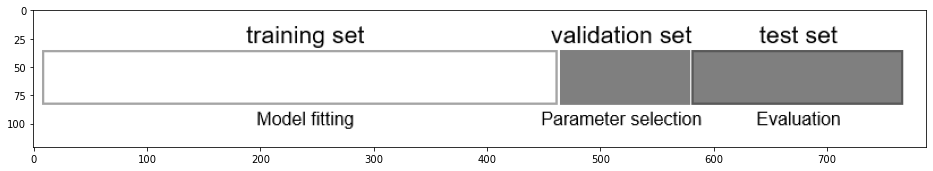

## Validacion cruzada

Esta es una estrategia para hacer muchos conjuntos de validación para que cada dato pueda ser incluido en el aprendizaje una vez.

Dividir el conjunto de datos en un número aleatorio n=k (k-pliegues).

Utilice el primer pliegue como conjunto de validación y utilice los otros k-1 pliegues como conjunto de entrenamiento, y mida el rendimiento.

Utilice el segundo pliegue como conjunto de prueba y los otros pliegues como conjunto de entrenamiento para el aprendizaje, y luego mida el rendimiento.

Repita el mismo proceso con todos los demás pliegues para poder incluir todos los datos en el entrenamiento.

Obtenga k resultados de evaluación del rendimiento y, a continuación, haga una media para predecir el rendimiento del modelo.

La siguiente figura es un ejemplo cuando k=5.

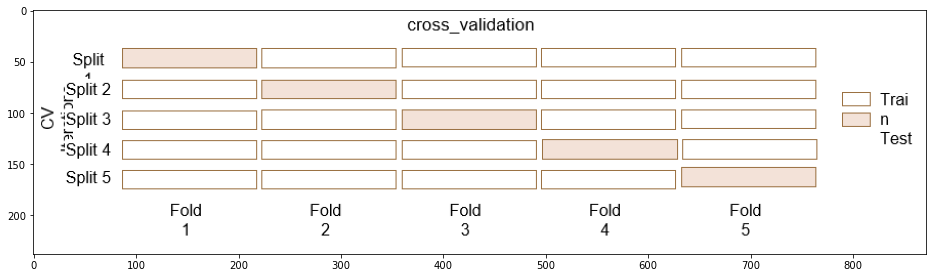

In [34]:
# la validacion cruzada puede realizarse facilmente utilizando la funcion
# cross_val_score de sklearn
import numpy as np
from sklearn.model_selection import cross_val_score , KFold # fold -> pliegue
# cross validation
cv=KFold(n_splits=10,shuffle=True,random_state=42)

results=cross_val_score(model,x_train,y_train,cv=cv)

for i,j in enumerate(results): #enumerate asigna pares al contador
    print(f"Score del fold(pliegue) numero {i} : {j}")
    
    
print(f"la eficiencia promedio es: {np.mean(results)}")

Score del fold(pliegue) numero 0 : 0.9
Score del fold(pliegue) numero 1 : 1.0
Score del fold(pliegue) numero 2 : 0.8
Score del fold(pliegue) numero 3 : 1.0
Score del fold(pliegue) numero 4 : 0.8
Score del fold(pliegue) numero 5 : 0.9
Score del fold(pliegue) numero 6 : 1.0
Score del fold(pliegue) numero 7 : 0.9
Score del fold(pliegue) numero 8 : 1.0
Score del fold(pliegue) numero 9 : 1.0
la eficiencia promedio es: 0.93
